In [152]:
from pathlib import Path

# Make the path object:
cache_path = Path('/tmp/cache')

# Just because we have made a cache path object doesn't mean that the directory
# we made exists; here we check if it exists and make the directory if not.
if not cache_path.exists():
    cache_path.mkdir()


In [153]:
from utilities import ls, crawl
import nibabel as nib

In [154]:
from cloudpathlib import S3Path, S3Client

client = S3Client(
    local_cache_dir=cache_path,
    no_sign_request=True)

hbn_base_path = S3Path(
    "s3://fcp-indi/",
    client=client)

In [155]:
# bids_path   = hbn_base_path / 'data' / 'Projects' / 'HBN' / 'MRI'/ 'Site-CUNY'
bids_path = hbn_base_path / "data" / "Projects" / "HBN" / "BIDS_curated" 
sub_code = ["sub-NDARAA948VFH", "sub-NDARAB055BPR"]

# # Quickly look if BIDSified
# print(bids_path)
# for sub in sub_code: 
#     sub_path = bids_path / f'{sub}'
#     crawl(sub_path)

In [156]:
# Set variables on your file names
bids_ses     = 'HBNsiteRU'
bids_acq_anat= 'HCP'
bids_acq_dwi = '64dir'

# Choose on sub to test
bids_sub_idx = 0 
bids_sub     = f'{subjects[bids_sub_idx]}'
bids_sub

'sub-NDARAA948VFH'

In [172]:
# Load T1w volume
t1_fname = bids_path / bids_sub / f'ses-{bids_ses}' /'anat' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_anat}_T1w.nii.gz'
t1_data, t1_affine, t1_nii    = load_nifti(t1w_fname, return_img=True)

# Set DWI file names
# base_dwi_fname  = bids_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_dwi}_dwi'
dwi_fname  = bids_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_dwi}_dwi.nii.gz'
bval_fname = bids_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_dwi}_dwi.bval'
bvec_fname = bids_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_dwi}_dwi.bvec'
# type(dwi_fname)

# Load volume
from dipy.io.image import load_nifti, save_nifti
dwi_data, dwi_affine, dwi_nii = load_nifti(dwi_fname, return_img=True)
dwi_nii     = nib.load(dwi_fname)
dwi_data    = dwi_nii.get_fdata()
dwi_hdr     = dwi_nii.header
# print(dwi_hdr)

In [173]:
# returns T1w data size &  dimensions of each voxel
print('T1w shape:')
print(t1_nii.shape)
print('voxel dimensions:')
print(t1_nii.header.get_zooms()[:3])

# returns dwi data size &  dimensions of each voxel
print('DWI shape:')
print(dwi_nii.shape)
print('voxel dimensions:')
print(dwi_nii.header.get_zooms()[:3])

T1w shape:
(224, 320, 320)
voxel dimensions:
(0.7999988, 0.8, 0.8)
DWI shape:
(104, 104, 72, 129)
voxel dimensions:
(1.7980769, 1.7980767, 1.8000027)


In [185]:
# get bvals and bvecs in a diffusion gradient table
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table

# get bvals and bvecs in a diffusion gradient table
bvals, bvecs = read_bvals_bvecs(bval_fname.fspath, bvec_fname.fspath)
print('Load gradient table')   
gtab = gradient_table(bvals, bvecs)

# Take  aquick look at the gradient table info & bvals
print('Gradients table info')
print(gtab.info)

# Show gradient table info & bvals
print('B-values')
print(gtab.bvals)
print('B-vectors')
print(gtab.bvecs[:10, :])

Load gradient table
Gradients table info
B-values shape (129,)
         min 0.000000
         max 2000.000000
B-vectors shape (129, 3)
          min -0.996103
          max 0.999997

None
B-values
[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.]
B-vectors
[[ 0.00

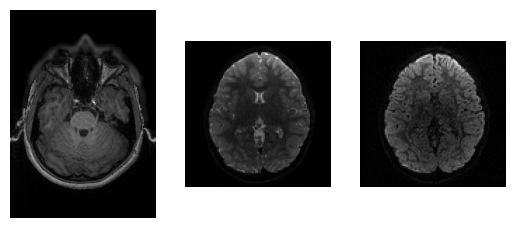

In [183]:
# quickly visualize the results
import matplotlib.pyplot as plt

sli = dwi_data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 3, 1).set_axis_off()                                  # plot volume in the left
plt.imshow(t1_data[:, :, 150].T, cmap ='gray', origin='lower')       # plot T1w sag view, slice 85 -roughly middline
plt.subplot(1, 3, 2).set_axis_off()     # plot volume in the middle
plt.imshow(dwi_data[:, :, sli, 0].T, cmap='gray', origin='lower')    # plot dMRI in axial view, slice 35 of volume 0 (b0)
plt.subplot(1, 3, 3).set_axis_off()     # plot volume in the right
plt.imshow(dwi_data[:, :, sli, 25].T, cmap='gray', origin='lower')   # plot dMRI in axial view, slice 35 of volume 24
plt.show()

(104, 104, 72, 129)
(1.7980769, 1.7980767, 1.8000027)
